In [14]:
import pandas as pd

In [15]:
train_data = pd.read_csv('/home/ubuntu/Downloads/train.csv')
test_data = pd.read_csv('/home/ubuntu/Downloads/test.csv')

In [16]:
all_comments_list = list(train_data['comment_text'])

In [17]:
all_words = [comment.split(' ') for comment in all_comments_list]

In [18]:
all_words_flattened = []
for list_as_words in all_words:
    all_words_flattened.extend(list_as_words)

In [19]:
from collections import Counter
import numpy as np

In [20]:
occurences_counter = Counter(all_words_flattened)

In [21]:
occurences_counter.most_common()

[('the', 267335),
 ('to', 173307),
 ('', 135015),
 ('of', 131942),
 ('and', 124039),
 ('a', 121406),
 ('I', 99455),
 ('is', 98841),
 ('you', 94183),
 ('that', 84784),
 ('in', 77899),
 ('for', 57870),
 ('it', 55477),
 ('on', 50736),
 ('not', 50728),
 ('be', 48660),
 ('this', 42684),
 ('have', 41688),
 ('as', 40848),
 ('are', 40091),
 ('with', 34142),
 ('your', 33178),
 ('was', 31659),
 ('or', 29119),
 ('but', 25350),
 ('an', 25164),
 ('from', 23439),
 ('by', 23180),
 ('my', 22812),
 ('at', 21995),
 ('article', 21933),
 ('"', 21335),
 ('about', 20939),
 ('do', 19016),
 ('The', 18729),
 ('if', 18537),
 ('can', 18334),
 ('has', 18107),
 ('will', 16736),
 ('would', 16711),
 ('page', 16339),
 ('like', 15577),
 ('me', 15342),
 ('what', 15335),
 ('been', 14891),
 ('so', 14881),
 ('all', 14087),
 ('just', 13900),
 ('any', 13885),
 ('they', 13824),
 ('which', 13687),
 ('one', 13577),
 ('should', 13463),
 ('-', 13408),
 ('no', 13235),
 ('more', 12802),
 ('If', 12695),
 ('other', 12449),
 ('there'

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
occurences_vec = [a[1] for a in occurences_counter.most_common()]

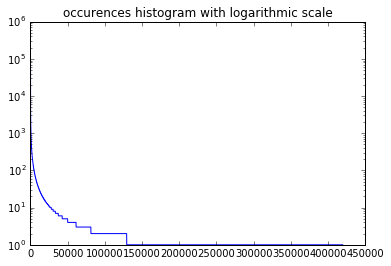

In [24]:
plt.semilogy(occurences_vec)
plt.title('occurences histogram with logarithmic scale')

# Now that we have plotted the words occurences, we are happy so we will divide our data to X and Y (X==samples, Y==ground truth) 

In [25]:
class_list = ['toxic','severe_toxic', 'obscene', 'threat','insult','identity_hate']

In [26]:
Y = train_data[class_list].as_matrix()

In [27]:
X = list(train_data['comment_text'])

In [28]:
Y

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [30]:
train_percent = 0.7
val_percent = 0.2
test_percent = 0.1

In [31]:
total_samples_num = len(Y)

In [32]:
total_samples_num

95851

In [33]:
train_sample_num = int(total_samples_num * train_percent)
val_sample_num = int(total_samples_num * val_percent)
test_sample_num = int(total_samples_num * test_percent)

In [34]:
print (train_sample_num,val_sample_num,test_sample_num)

67095 19170 9585


In [35]:
last_train_index = train_sample_num 
last_val_index = last_train_index + val_sample_num
first_test_index = last_val_index

In [36]:
train_X = X[:last_train_index]
val_X = X[last_train_index:last_val_index]
test_X = X[first_test_index :]

In [37]:
train_Y = Y[:last_train_index]
val_Y = Y[last_train_index:last_val_index]
test_Y = Y[first_test_index :]

In [38]:
len(train_X)

67095

In [39]:
train_Y.shape

(67095, 6)

In [40]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [41]:
my_tokenizer = Tokenizer(num_words=10000)

In [42]:
my_tokenizer.fit_on_texts(train_X)

In [43]:
#our dictionary 
len(set(list(my_tokenizer.word_index.values())))

122851

In [44]:
train_X_tokenized = my_tokenizer.texts_to_sequences(train_X)
val_X_tokenized = my_tokenizer.texts_to_sequences(val_X)
test_X_tokenized = my_tokenizer.texts_to_sequences(test_X)

In [51]:
train_X[0]

"Nonsense?  kiss off, geek. what I said is true.  I'll have your account terminated."

In [52]:
train_X_tokenized[0]

[799, 4690, 212, 6731, 40, 7, 166, 8, 398, 235, 19, 20, 355]

# task : define a keras model for this task, look at the rnn example as reference

In [45]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Activation

In [46]:
X_train_tokenized_padded = sequence.pad_sequences(train_X_tokenized, maxlen=20)
X_val_tokenized_padded = sequence.pad_sequences(val_X_tokenized, maxlen=20)
X_test_tokenized_padded = sequence.pad_sequences(test_X_tokenized, maxlen=20)

In [56]:
train_X_tokenized[0]

[799, 4690, 212, 6731, 40, 7, 166, 8, 398, 235, 19, 20, 355]

In [53]:
X_train_tokenized_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,  799, 4690,  212, 6731,
         40,    7,  166,    8,  398,  235,   19,   20,  355], dtype=int32)

In [58]:
model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 128 ))
model.add(LSTM(300))
model.add(Dense(6))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
model.fit(X_train_tokenized_padded,train_Y)

Epoch 1/1
67095/67095 [==============================] - 250s 4ms/step - loss: 0.2996 - acc: 0.9931


# task : write code to feed the model with new sentences 

In [ ]:
test_sentence = ["I will kill you "] # needs to be an array

In [ ]:
test_sentence_tokenized = my_tokenizer.texts_to_sequences(test_sentence)
test_sentence_tokenized_padded = sequence.pad_sequences (test_sentence_tokenized, maxlen = 20)

In [ ]:
predictions = model.predict(test_sentence_tokenized_padded)
class_list # 1, 0, 1, 0, 1, 0

In [ ]:
for i in range(len(class_list)):
    print (class_list[i] + " prediction is " + str(predictions[0][i]))

In [ ]:
assert 0

In [ ]:
plt.plot(val_Y_pred[5],'bo')

In [ ]:
obscene_pred =  val_Y_pred[:,2]
obscene_gt = val_Y[:,2]
gt_vec = np.where(obscene_gt ==1)[0]

In [ ]:
pred_vec = np.where(obscene_pred>0.7)[0]

In [ ]:
sentences_indices_on_which_we_were_correct = set(pred_vec).intersection(set(gt_vec))

In [ ]:
recall = 100 *len(sentences_indices_on_which_we_were_correct)/ float(len(gt_vec)) 
precision  = 100 * (len(sentences_indices_on_which_we_were_correct) / float(len(pred_vec)))

In [ ]:
print ( 'our recall is {}'.format (recall))
print ('but we have {} precision'.format(precision))

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(obscene_gt,obscene_pred)

In [ ]:
thresholds[::1000]

In [ ]:
recall[::100]

In [ ]:
precision[::1000]

In [ ]:
plt.plot(recall[::1000],precision[::1000])
plt.xlabel('recall')
plt.ylabel('precision')